> **Student Name:** Mylla Pereira de Castro
>
> **Student Number:** T00244395




# **Stage 1**
***Describe Data***

The dataset used as part of this assignment contains global surface temperature changes collected monthly from 1961 to 2022 and currently available in FAOSTAT website. FAO (Food and Agriculture Organization) is an United Nation's agency and collects and distributes data with the goal of defeating global hunger.

The temperature change statistics data is updated annually with data sourced from GISTEMP data, the Global Surface Temperature Change data distributed by National Aeronaitics and Space Administration Goddard Institue for Space Studies (NASA-GISS).

This dataset contains the following columns:

>**Area Code:** The numerical code of the area column (integer)
>
>**Area:** Countries and territorries (object)
>
>**Months Code:** The numerical code of months column (integer)
>
>**Months:** Months, seasons, Metereological year (object)
>
>**Element Code:** The numerical code of element column (integer)
>
>**Element:** "Temperature change" or "Standard Deviation" (object)
>
>**Unit:** Celsius degree °C (object)
>
>**Y1961**
>[...]
>**Y2022:** Columns with numerical representation of Element from 1961 to 2019


Let's exam the data a bit closer!

In [102]:
# Importing libraries (make sure these libraries are installed in the runtime)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importing the data
temp_change_path = "./FAOSTAT_data_en_4-28-2023.csv"
temp_change_df = pd.read_csv(temp_change_path)


# Dataframe shape
temp_change_df.shape

"""
(238051, 14)
"""

# Dataframe info
temp_change_df.info

<bound method DataFrame.info of        Domain Code                      Domain  Area Code (M49)         Area  \
0               ET  Temperature change on land                4  Afghanistan   
1               ET  Temperature change on land                4  Afghanistan   
2               ET  Temperature change on land                4  Afghanistan   
3               ET  Temperature change on land                4  Afghanistan   
4               ET  Temperature change on land                4  Afghanistan   
...            ...                         ...              ...          ...   
238046          ET  Temperature change on land              716     Zimbabwe   
238047          ET  Temperature change on land              716     Zimbabwe   
238048          ET  Temperature change on land              716     Zimbabwe   
238049          ET  Temperature change on land              716     Zimbabwe   
238050          ET  Temperature change on land              716     Zimbabwe   

       

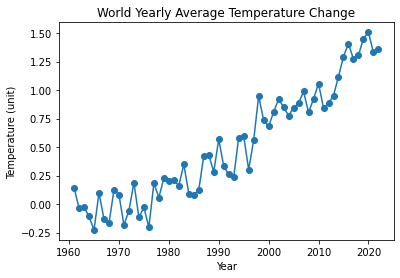

In [103]:
# Plotting the data to visualise the temperature change over the years in the world

# Group the data by year and calculate the mean temperature for each year
df_yearly = temp_change_df.groupby(['Year'])['Value'].mean().reset_index()

# Plot temperature data as a line plot
plt.plot(df_yearly['Year'], df_yearly['Value'], marker='o')

# Set the plot title and axis labels
plt.title('World Yearly Average Temperature Change')
plt.xlabel('Year')
plt.ylabel('Temperature (unit)')

# Display the plot
plt.show()

In [104]:
# Let's get the numeric average of temperature increase in the world
print(f'Average of temperature change over the years {df_yearly["Value"].mean()}')

# And show countries with the highest and lowest temperature change mean since 1961
temp_change_df.groupby(['Area'])['Value'].mean().sort_values(ascending=False)


Average of temperature change over the years 0.509437575703311


Area
Luxembourg                         1.584657
Serbia                             1.552727
Estonia                            1.549899
Belgium                            1.525731
Russian Federation                 1.514425
                                     ...   
Pacific Islands Trust Territory    0.054901
Falkland Islands (Malvinas)        0.021628
Yugoslav SFR                       0.019567
Nauru                             -0.024839
Pitcairn                          -0.098580
Name: Value, Length: 247, dtype: float64

/var/folders/w3/5k38nc1d35zbfg1ff2_nj_rh0000gn/T/ipykernel_76742/2780737990.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(temp_change_df.corr(), annot=True)


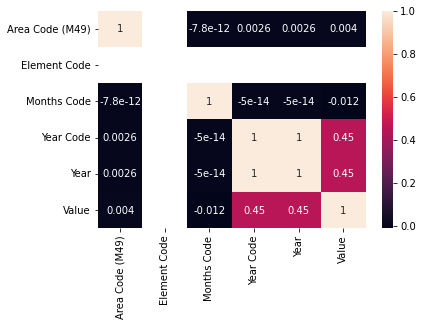

In [105]:
# Correlating data features
sns.heatmap(temp_change_df.corr(), annot=True)
plt.show()

The Value and Year columns are high correlated and the main ones we'll be using here

# **Stage 2**

Justification for the property that you would like the model to predict.

# **Stage 3**

Cleaning the data, linking datasets etc.. 



In [106]:
# Removing irrelevant columns
temp_change_df.drop(['Domain Code', 'Domain', 'Area Code (M49)', 'Element Code', 'Months Code', 'Months', 'Year Code', 'Flag', 'Flag Description', 'Element'], axis=1, inplace=True)

# Removing duplicates
temp_change_df.drop_duplicates()

# Number of nulls in each column
temp_change_df.isnull().sum()



Area        0
Year        0
Unit        0
Value    8196
dtype: int64

In [107]:
# Let's see if all rows "Unit" is in Celsius
print((temp_change_df['Unit'] == '°C').sum() == temp_change_df.shape[0])

True


In [108]:
print(f'Average of temperature change over the years {df_yearly["Value"].mean()}')

# Now, since there are 8196 rows without a "Value" column is less than 5% of the data, I will drop these and see if there's any significant change in the world's temperature change average
temp_change_df = temp_change_df.dropna()

print(f'Average of temperature change over the years {df_yearly["Value"].mean()}')

# The overall mean hasn't changed, we should be good to proceed

Average of temperature change over the years 0.509437575703311
Average of temperature change over the years 0.509437575703311


# **Stage 4**
Choose and train Estimator.

In order to choose an estimator, I will be following the documentation and criteria in resource below:
https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

By analysing the temperature changes dataset, we know that:
- It had more than 50 samples
- No category needs to be predicted but a quantity
- There are more than 100k samples (> 238k)
- And only a few features are important (Area and Year)

For that reason, I should be using a linear regression model.

# **Stage 5**
Evaluate your model and revisit 4...repeat..

# **Stage 6**
***Present results and Conclusions***

